$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge Nº5 | Clustering}$$


_Integrantes:_

* _José Cebrián Baca_

* _Ana Lucia Manrique De La Torre_

* _Willy Valdivia_

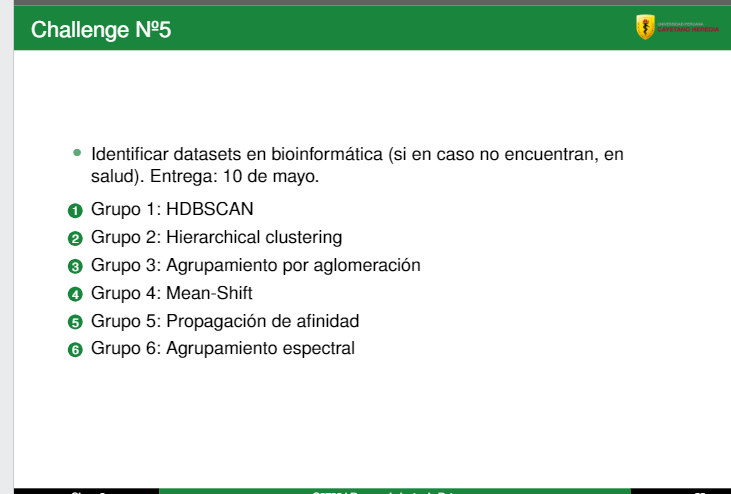

## $Justificación:$

El repositorio elegido para el desarrollo del challenge N°5 es el llamado "gene expression cancer RNA-Seq Data Set" presente en el repositorio UCI Machine Learning. Esta base de datos consiste en un conjunto de datos de expresión génica de cáncer que contiene datos de expresión génica derivados de tecnologías de secuenciación de ARN (RNA-Seq) para una amplia variedad de tipos de cáncer. Se uso hicherical clustering para identificar subgrupos de muestras de cáncer que comparten patrones de expresión génica similares. Para ello, se desarrolló el siguiente codigo.

Se descargó la data desde Google Drive, mediante el comando !gdown.

In [1]:
!gdown 1J_p-mjBgrvZsJG1WyWy9Sc_2H563FRVw
!gdown 1AFkk3XNQkUQb5OnteJNt8xtEYJg999UI

Downloading...
From: https://drive.google.com/uc?id=1J_p-mjBgrvZsJG1WyWy9Sc_2H563FRVw
To: /content/labels.csv
100% 12.7k/12.7k [00:00<00:00, 35.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AFkk3XNQkUQb5OnteJNt8xtEYJg999UI
To: /content/data.csv
100% 206M/206M [00:02<00:00, 76.4MB/s]


## $Análisis$ $exploratorio$ $de$ $datos$ $(EDA)$$:$

A continuación, se importó librerias como pandas y numpy. Ademas, se cargaron en una variable df la data descargada correspondiente a la expresión de cada gen. Y, en otra variable df_l los tipos de tumores correspondientes a cada fila.

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("data.csv",index_col=[0])
df_l=pd.read_csv("labels.csv",index_col=[0])

De esta manera, se tiene las siguientes expresiones genicas.

In [3]:
df

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


A continuación, se muestra la información del dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, sample_0 to sample_800
Columns: 20531 entries, gene_0 to gene_20530
dtypes: float64(20531)
memory usage: 125.5+ MB


In [5]:
df.isnull().sum().sum()

0

Se puede observar que no se identifican ningún valor nulo en el dataframe corespondiente a expresiones genicas. Por otra parte, se muestra el dataframe correspondiente a cada tipo de tumor para cada fila de expresiones génicas.

In [6]:
df_l

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA
...,...
sample_796,BRCA
sample_797,LUAD
sample_798,COAD
sample_799,PRAD


In [7]:
df_l.nunique()

Class    5
dtype: int64

Del dataframe llamado df_l, se observa que hay 5 tipos de tumores.

In [8]:
df.shape

(801, 20531)

También, se observa el tamaño del dataframe correspondiente a las expresiones génicas. Se puede observar que contiene una gran cantidad de columnas.

## $Escalamiento$ $de$ $datos$$:$

Se realizo un escalamiento normalizado para el conjunto de datos de expresión génica.

In [9]:
from sklearn.preprocessing import StandardScaler, normalize
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

## $Análisis$ $de$ $componentes$ $principales$ $(PCA)$$:$

 A continuación, se utiliza la biblioteca scikit-learn de Python para realizar un análisis de componentes principales (PCA) y visualizar la varianza explicada por cada uno de los componentes principales derivados del PCA. Ello, se hace para reducir el numero de variables que como vimos anteriormente son demasiadas.

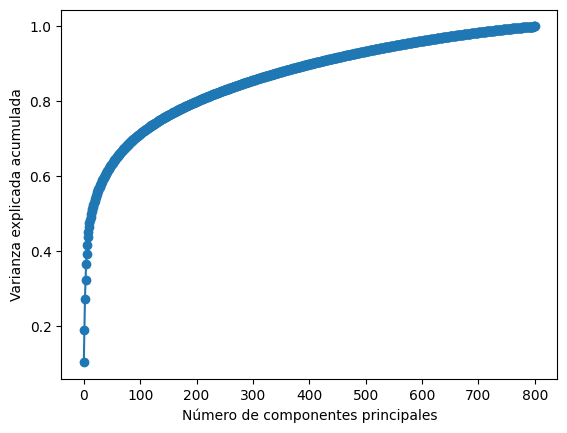

In [10]:
from sklearn.decomposition import PCA

# Supongamos que tus datos están almacenados en el dataframe 'X'
pca = PCA(n_components=normalized_df.shape[0])
pca.fit(normalized_df)

# La varianza explicada de cada componente se encuentra en pca.explained_variance_ratio_
# Podemos calcular la varianza acumulada de la siguiente manera:
variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Graficamos la varianza explicada en función del número de componentes principales
import matplotlib.pyplot as plt

plt.plot(variance_ratio_cumsum, '-o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.show()

De esta forma, al realizar este analisis y el calculo de la varianza explicada, se elige el numero de componentes principales necesarios para explicar el 85% de la varianza, los cuales seran usados en la elaboracion del modelo.

In [11]:
pca = PCA(n_components = 0.85)
df_pca = pca.fit_transform(normalized_df)
print("Número de componentes principales necesarios para explicar el 85% de la varianza: ", pca.n_components_)

Número de componentes principales necesarios para explicar el 85% de la varianza:  288


Luego, se realiza un mapa de calor para identificar patrones o tendencias en los datos que pueden ser relevantes para la interpretación de los resultados de un modelo de clustering jerárquico (Hierarchical Clustering).

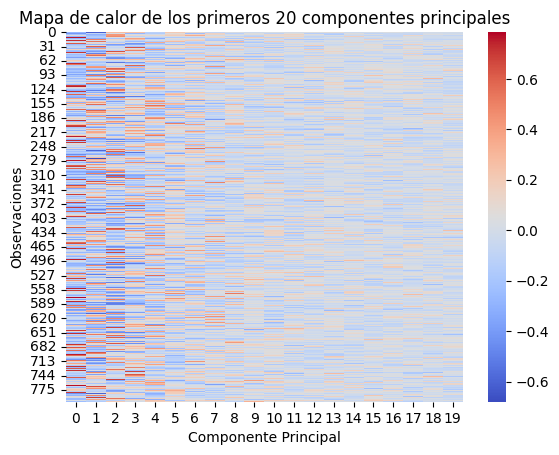

In [12]:
import seaborn as sns

sns.heatmap(df_pca[:, :20], cmap='coolwarm')
plt.xlabel('Componente Principal')
plt.ylabel('Observaciones')
plt.title('Mapa de calor de los primeros 20 componentes principales')
plt.show()

## $Elaboración$ $del$ $modelo$ $hierarchical$ $clustering$$:$

Se lleva a cabo el proceso de clustering jerárquico utilizando el método de clustering aglomerativo con el algoritmo de Ward, y luego se visualiza los resultados mediante un dendrograma y un gráfico de dispersión

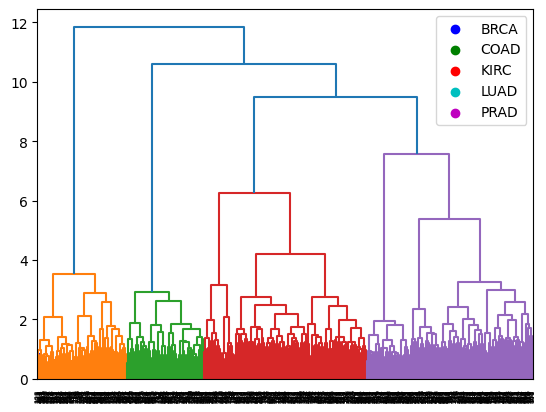

In [13]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Realizar el clustering jerárquico utilizando el método de clustering aglomerativo
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(df_pca)

# Visualizar el dendrograma
Z = dendrogram(linkage(df_pca, method='ward'))

# Visualizar los clusters
labels = np.unique(df_l)
colors = ['b', 'g', 'r', 'c', 'm']
for i, label in enumerate(labels):
    idx = np.where(df_l == label)[0]
    plt.scatter(df_pca[idx, 0], df_pca[idx, 1], c=colors[i], label=label)
plt.legend()

# Mostrar el gráfico
plt.show()

De esta forma, al tener el modelo ya establecido en la data proveniente del PCA, se calcula las frecuencias de cada cluster en el conjunto de datos clasificado. 

In [15]:
np.unique(clustering.labels_, return_counts = True)

(array([0, 1, 2, 3, 4]), array([263, 199, 124, 145,  70]))

También, se visualiza la cantidad de tipos de tumores del dataframe original. Así como también, el número de elementos que pertenece a cada tipo de tumor.

In [14]:
df_l.value_counts()

Class
BRCA     300
KIRC     146
LUAD     141
PRAD     136
COAD      78
dtype: int64

Por último, se aplica el algoritmo hierarchical clustering en el dataframe original sin procesamiento de PCA ni escalamiento.

In [16]:
clustering_all = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(df)

Y, se observa el siguiente agrupamiento.

In [17]:
np.unique(clustering_all.labels_, return_counts = True)

(array([0, 1, 2, 3, 4]), array([301, 146, 136, 141,  77]))

## $Discusión$ $y$ $conclusión$$:$

Al visualizar los resultados de cada algoritmo, se puede observar que el agrupamiento de las clases fue más preciso en el conjunto de datos sin aplicar técnicas de escalamiento ni análisis de PCA, debido a que se asemeja mejor al número de frecuencias de cada tipo de tumor en los datos originales. Por otro lado, en el conjunto de datos que se aplicaron técnicas de escalamiento y PCA, el rendimiento fue menos preciso al comparar las frecuencias de cada tumor con el dataframe original. 


En conclusión, se puede inferir que en algunos casos la aplicación de técnicas de escalamiento y PCA en los datos antes de realizar el clustering jerárquico puede no mejorar el resultado de la agrupación de las clases. Por lo que, se debe probar y evaluar diferentes técnicas para obtener el mejor resultado posible.